# IT3385 – Task 1: Exploratory Data Analysis (EDA)
**Dataset:** Melbourne Residential Property Prices  
## Ian Chia (230746D)  


## For task 1: 
### I will be doing exploratory data anaylsis and some minimal data preparation/cleaning so that my charts will be more accurate. However more advance data cleaning will be done in task 2


## 1. Imports & Load Data

In [2]:
import os, math, statistics, textwrap
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Load the dataset (csv) 
df = pd.read_csv(r"data/training/01_Melbourne_Residential.csv")
print(df.shape)
df.head(3)

(13580, 21)


,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
0,Airport West,154 Halsey Rd,3,t,840000,PI,Nelson,3/9/2023,13.5,3042,...,2,1.0,303,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464
1,Albert Park,105 Kerferd Rd,2,h,1275000,S,hockingstuart,3/9/2023,3.3,3206,...,1,0.0,120,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280
2,Albert Park,85 Richardson St,2,h,1455000,S,Thomson,3/9/2023,3.3,3206,...,1,0.0,159,NaN,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280


### To start off, after we "df.head()" we can see that there are 2 columns called "Method" and "Type" with mysterious values. Hence I decided to look into - what does the "method" and "type" column mean?

**Method** which is also known as the selling Method

This column indicates the sales method used to sell the property.
Typical values:

S → Property sold at auction

SP → Property sold prior to auction

PI → Property passed in at auction (did not sell)

PN → Property sold but price not disclosed

VB → Property sold with a vendor bid

**In short, it tells you how the sale was finalized.**

------------------

**Type** (Property Type)

This column indicates the dwelling type.
Typical values:

h → House, cottage, villa, etc.

u → Unit / Apartment

t → Townhouse

**This tells you what kind of property was sold.**

## 2. Data exploration / Cleaning

### Check the data types, and convert them if neccessary

In [11]:
#Check the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   Seller         13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [19]:
#Since the Date is currently an "object" datatype, i will be converting it to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

#Categorical columns (should be category type for efficiency):
for col in ['Suburb','Type','Method','Seller','CouncilArea','Region']:
    df[col] = df[col].astype('category')


### Reason for converting these columns data types:

- **Date column**:  
  Initially, the **Date** column was stored as an **object** (string).  
  Converting it to a proper **datetime** format makes it easier to:
  - Extract components like year, month, or day.
  - Perform time-based operations

- **Categorical columns**:  
  Columns such as **Suburb**, **Type**, **Method**, **Seller**, **CouncilArea**, and **Region** 
  were converted from  'object' to 'category'.  
  This conversion is useful because:
  - It reduces memory usage by storing repeated labels more efficiently.
  - It speeds up operations like grouping, filtering, and encoding for modeling.
  - It makes clear to both humans and machine learning algorithms that 
    these columns represent **categories/labels** rather than free text.

In [20]:
#Check if the data types have changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  category      
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  category      
 4   Price          13580 non-null  int64         
 5   Method         13580 non-null  category      
 6   Seller         13580 non-null  category      
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  int64         
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13580 non-null  float64       
 13  Landsize       13580 non-null  int64         
 14  BuildingArea   13580 non-null  float64       
 15  YearBuilt      1358

**Use category when:**

Column has repeated labels (Suburb, Type, Region, Method).
It will be easier to use the column for grouping, modeling, or categorical encoding.

**Keep as object when:**

Column is free text which makes the values unique (like Address, Seller names — unless you plan to encode them).

------------------------

In [12]:
#basic information about the dataset 
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


-------------

### Check for missing values

In [13]:
#Check for missing values
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
Seller              0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Region              0
Propertycount       0
dtype: int64

### There are missing values for the "Car" , 'BuildingArea" , "YeaarBuilt" and "CouncilArea" columns

In [17]:
#I will be handling the missing values for those columns stated above. (EDA)

# Fill numerical
df['Car'] = df['Car'].fillna(df['Car'].median())
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].median())
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())

# Fill categorical (new catergory)
df['CouncilArea'] = df['CouncilArea'].fillna('Unknown')


### Since several columns contain missing values, to maintain as much data as possible, I applied these strategies:

- Numerical columns (Car, BuildingArea, YearBuilt):  
  - Missing values were replaced with the **median** of the column.  
  - The median is preferred over the mean because it is more **robust to outliers** 
    and better represents the "typical" value in skewed distributions.  
  - This ensures the dataset remains complete without introducing extreme 
    biases from unusually large or small values.

- Categorical column (CouncilArea):  
  - Missing values were filled with a new category labeled **"Unknown"**.  
  - This approach preserves all rows without making arbitrary assumptions 
    and allows us to explicitly track properties with unspecified council areas.

In [18]:
#Check that the missing values has been removed 
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
Seller           0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Region           0
Propertycount    0
dtype: int64

-----------------------------------

### Check for duplicate values

In [16]:
#Check how many duplicates exist
print("Total duplicate rows:", df.duplicated().sum())

Total duplicate rows: 0


### There are no duplicate rows, no action needed

-----------------------------------

# 3. Charts and Visuals

**Since I have finished some basic EDA, and did some basic data cleaning, I will now be moving on to some visuals to better understand my data.** 

**To do this, I will be showing you two types of distributions, "Univariate distributions" and "bivaraite distributions"**


## Univariate Distributions

This is the analysis of a single variable at a time. By doing this, it will helps us understand the basic structure of the data 

In addition, we will be able to detect skewness , outleirs , and common values.

The following charts show the distributions of key **numerical** variables 
(e.g., Price, Rooms, Distance, Landsize, BuildingArea, YearBuilt, Age at Sale, Price per sqm) 
and **categorical** variables (e.g., Property Type, Method, Region) where it shows the most common catergories and thier freqency



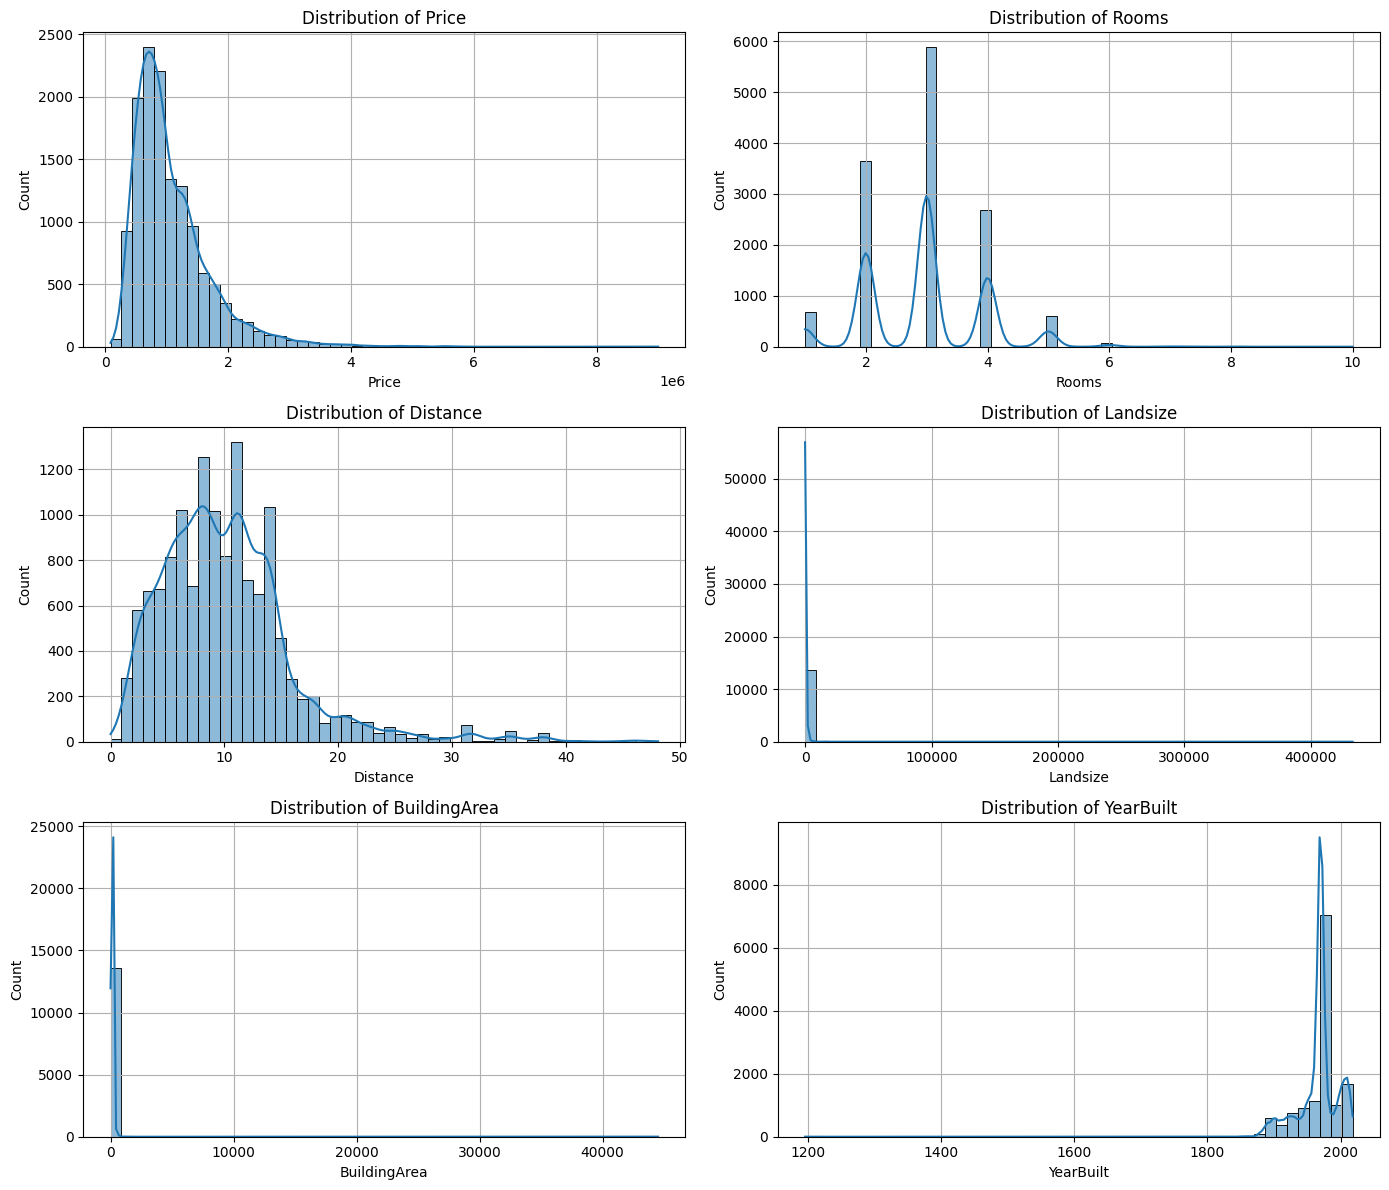

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---- NUMERIC UNIVARIATE ----
num_cols = ['Price','Rooms','Distance','Landsize','BuildingArea','YearBuilt','age_at_sale','price_per_sqm']
num_cols = [c for c in num_cols if c in df.columns]

fig, axes = plt.subplots(nrows=math.ceil(len(num_cols)/2), ncols=2, figsize=(14, 4*math.ceil(len(num_cols)/2)))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# remove empty subplots if odd number of cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Short summary of the charts

### Univariate Analysis (Numeric Features)

- **Price**: Right-skewed distribution with most properties priced below 1 million, but with some extreme outliers above 3 million.  
- **Rooms**: Clear peaks at 2, 3, and 4 rooms, showing that these are the most common house sizes.  
- **Distance**: Most properties are lie within 10–15 km of the CBD, with very little houses at further distances.  
- **Landsize**: Highly skewed with many small plots and a few very large outliers, indicating strong variability in land sizes.  
- **BuildingArea**: Similar to landsize, most properties have relatively small building areas, with extreme outliers present.  
- **YearBuilt**: Most of  the properties were built after 1900, with noticeable peaks around more recent decades, this shows Melbourne’s urban development.

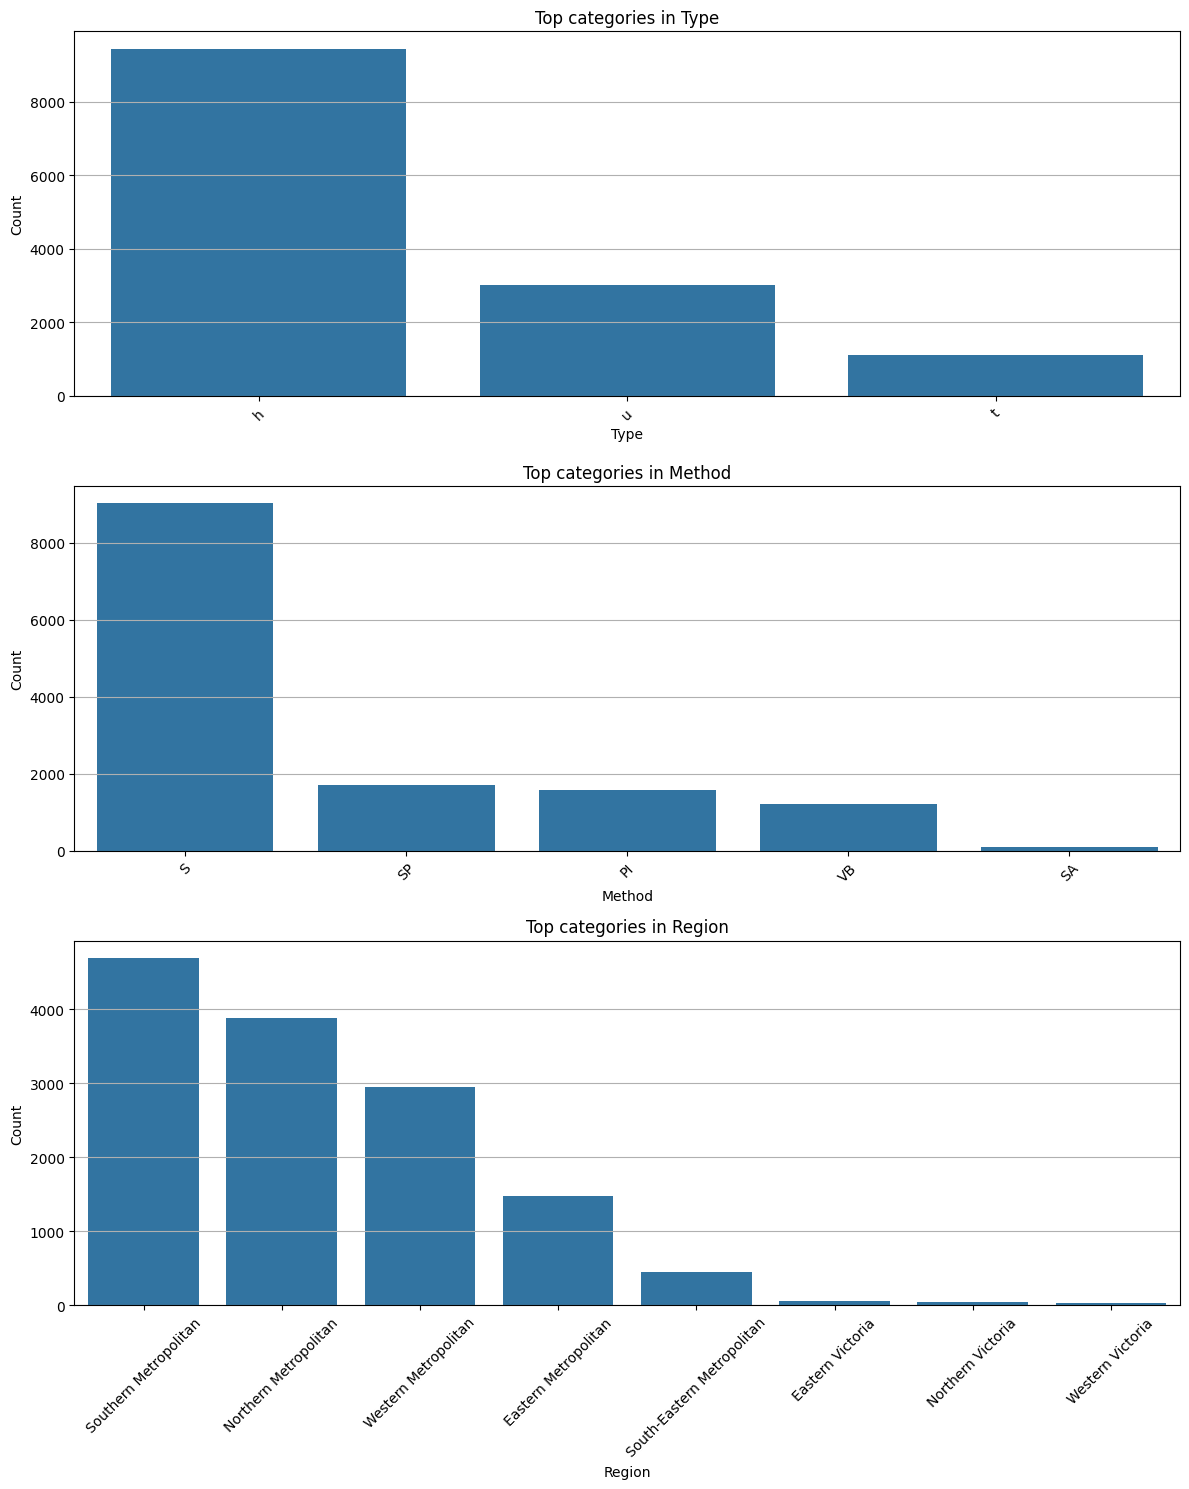

In [27]:
# ---- CATEGORICAL UNIVARIATE ----
cat_cols = ['Type','Method','Region']
cat_cols = [c for c in cat_cols if c in df.columns]

fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(12, 5*len(cat_cols)))

if len(cat_cols) == 1:
    axes = [axes]  # ensure iterable

for i, col in enumerate(cat_cols):
    counts = df[col].value_counts().head(12)
    sns.barplot(x=counts.index.astype(str), y=counts.values, ax=axes[i])
    axes[i].set_title(f"Top categories in {col}")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


### Univariate Analysis (Categorical Features)

- **Type**: Most properties are **houses (`h`), followed by **units/apartments (`u`), with **townhouses (`t`) being less common.  
  This shows the dataset is dominated/contains detached houses.

- **Method**: The majority of sales were made through **auction (`S`), with some sold **prior to auction (`SP`) or marked as **passed in (`PI`) or **vendor bid (`VB`).  
  This emphasies alot on Melbourne’s strong auction-driven property market.

- **Region**: Properties are spread across multiple Melbourne regions, but certain regions dominate the dataset while some seems to have little to none.  
  For example, the **Northern Metropolitan** and **Southern Metropolitan** regions appear more frequently, this shows where most recorded sales usually occurr.


##  Bivariate Relationships

This is the analysis of two variables together, often one dependent variable which in this case will be **price** and one independent feature.

This is so that we can examine relationships, correlations, and patterns.

In addition, by doing this we will be able to:

Reveals dependencies (e.g., number of rooms and price), guides feature selection (which features strongly influence the target). This will be useful for checking linearity, clusters, or heteroscedasticity.

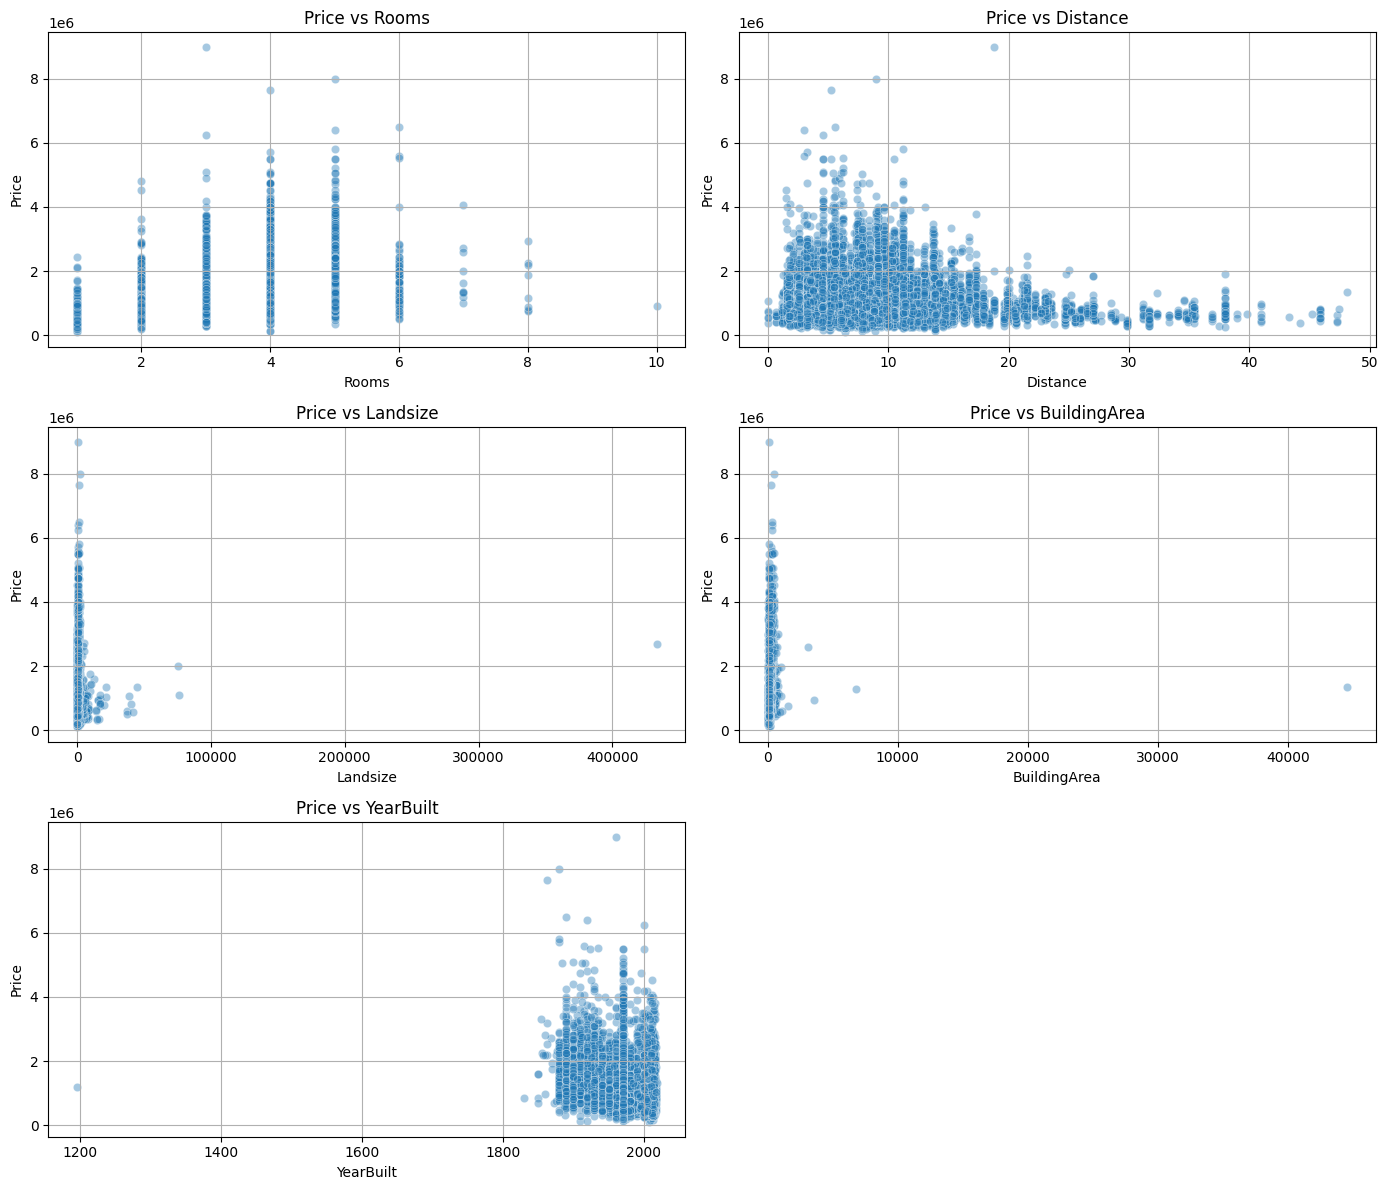

In [28]:
import math

# Choose relevant numeric features (exclude lat/long)
bi_num_cols = ['Rooms','Distance','Landsize','BuildingArea','YearBuilt','age_at_sale','price_per_sqm']
bi_num_cols = [c for c in bi_num_cols if c in df.columns]

# Grid of scatterplots
fig, axes = plt.subplots(nrows=math.ceil(len(bi_num_cols)/2), ncols=2, figsize=(14, 4*math.ceil(len(bi_num_cols)/2)))
axes = axes.flatten()

for i, col in enumerate(bi_num_cols):
    sns.scatterplot(x=df[col], y=df['Price'], alpha=0.4, ax=axes[i])
    axes[i].set_title(f"Price vs {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Price")

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Bivariate Analysis (Numeric Features vs Price)

- **Price vs Rooms**:  
  Properties with more rooms generally tend to have higher prices, though extreme outliers exist (e.g., small homes with very high prices).  
  Most sales cluster between 2–4 rooms.

- **Price vs Distance**:  
  There is a negative relationship — those properties closer to the CBD with low distances are usually more expensive, while prices decrease as distance increases.

- **Price vs Landsize**:  
  Highly skewed with many small land sizes. While larger lands occasionally command higher prices, however the relationship is weak due to the extreme outliers.

- **Price vs BuildingArea**:  
  A positive trend is visible — larger building areas tend to correlate with higher prices, though the data contains lots of outliers.

- **Price vs YearBuilt**:  
  Most properties were built after 1900. Newer houses tend to generally have higher prices compared to very old ones, but the trend from the chart is not perfectly linear with no visiable trend maybe due to market variations.


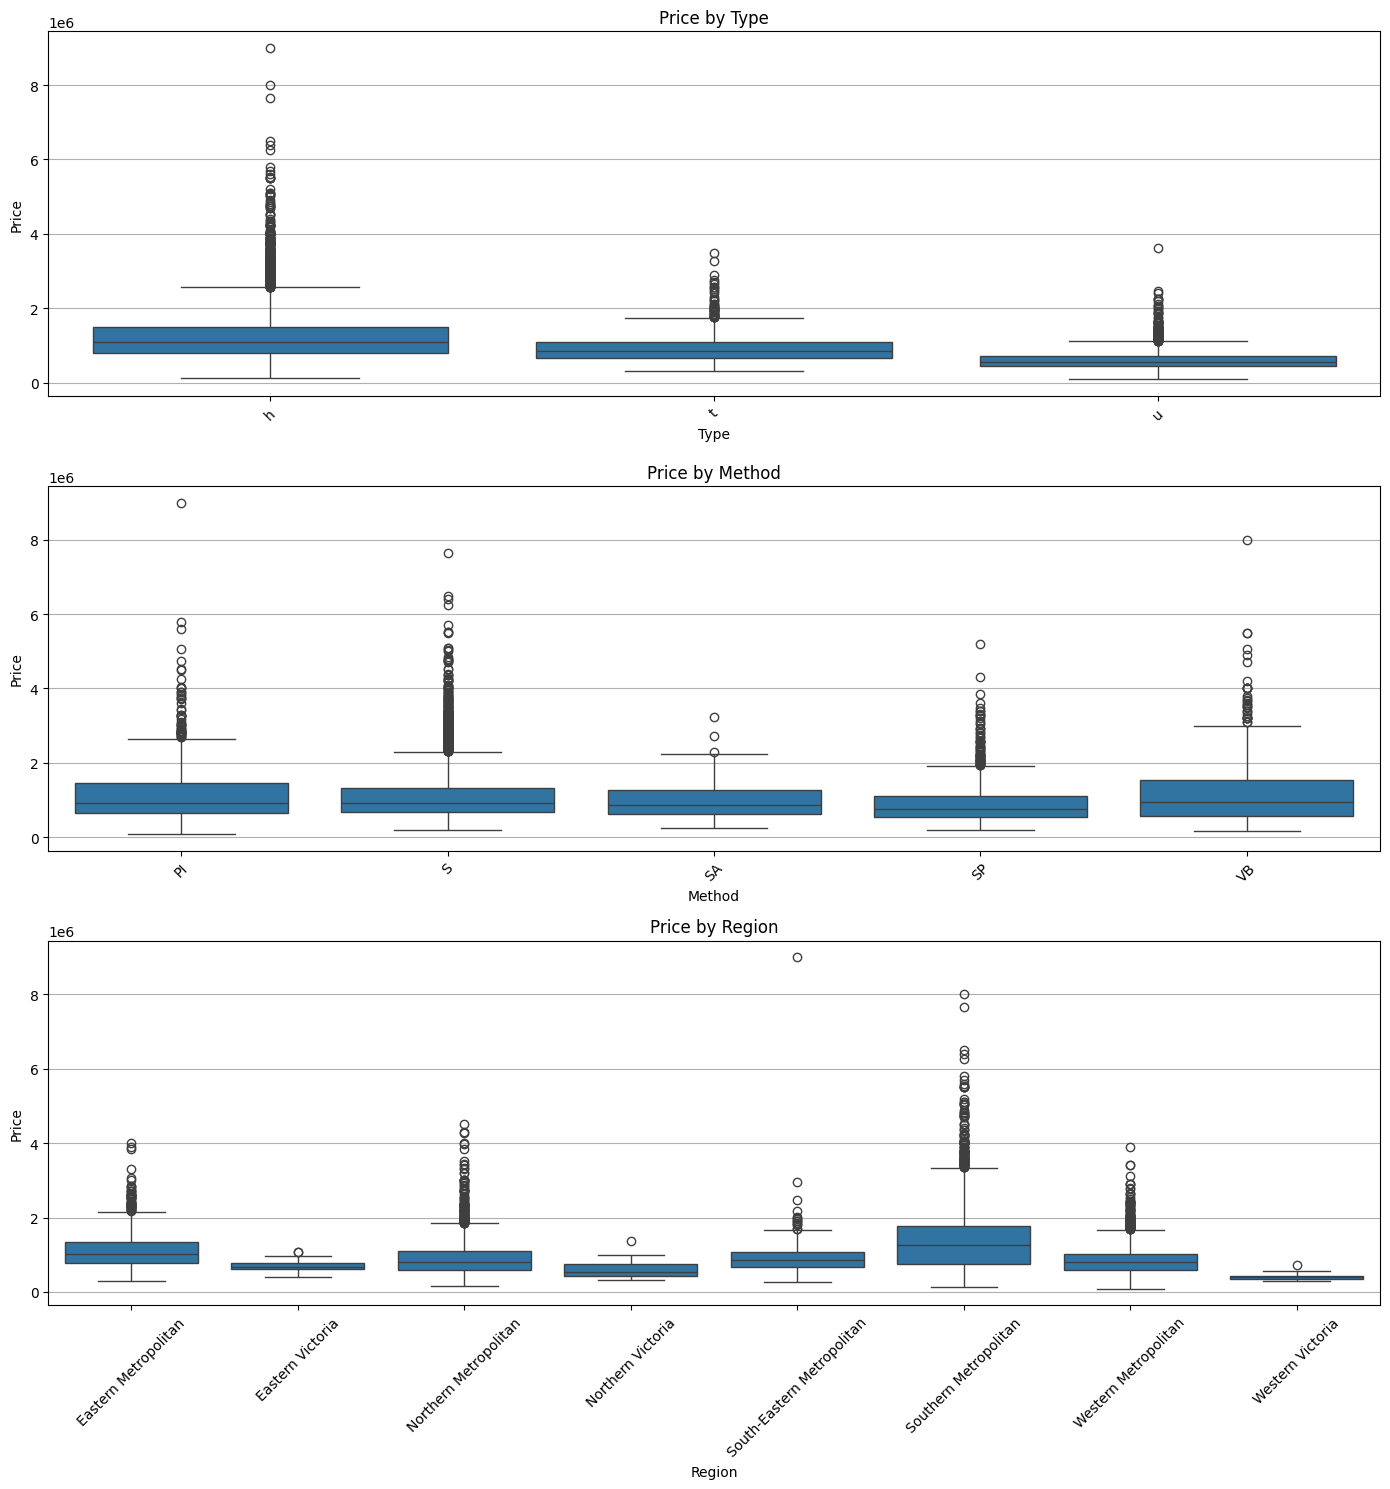

In [29]:
# Relevant categorical features
cat_bi_cols = ['Type','Method','Region']
cat_bi_cols = [c for c in cat_bi_cols if c in df.columns]

fig, axes = plt.subplots(nrows=len(cat_bi_cols), ncols=1, figsize=(14, 5*len(cat_bi_cols)))

if len(cat_bi_cols) == 1:
    axes = [axes]

for i, col in enumerate(cat_bi_cols):
    sns.boxplot(x=col, y='Price', data=df, ax=axes[i])
    axes[i].set_title(f"Price by {col}")
    axes[i].set_ylabel("Price")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


### Bivariate Analysis (Categorical Features vs Price)

- **Price by Type**:  
  Houses (`h`) tend to have the highest median prices, followed by townhouses (`t`), while units/apartments (`u`) are generally the least expensive.  
  This aligns with expectations since houses usually offer more land and space.

- **Price by Method**:  
  Properties sold at auction (`S`) often achieve higher prices compared to other methods.  
  Properties sold prior to auction (`SP`) or passed in (`PI`) typically show lower price ranges.  
  This reflects Melbourne’s strong auction-driven housing market.

- **Price by Region**:  
  Clear differences exist across Melbourne regions.  
  Inner metropolitan areas (e.g., Northern Metropolitan, Southern Metropolitan) generally have higher median prices compared to outer suburban regions.  
  This highlights the importance of location when it comes to the property value.

---------------------



## 4. Corrrelation Matrix

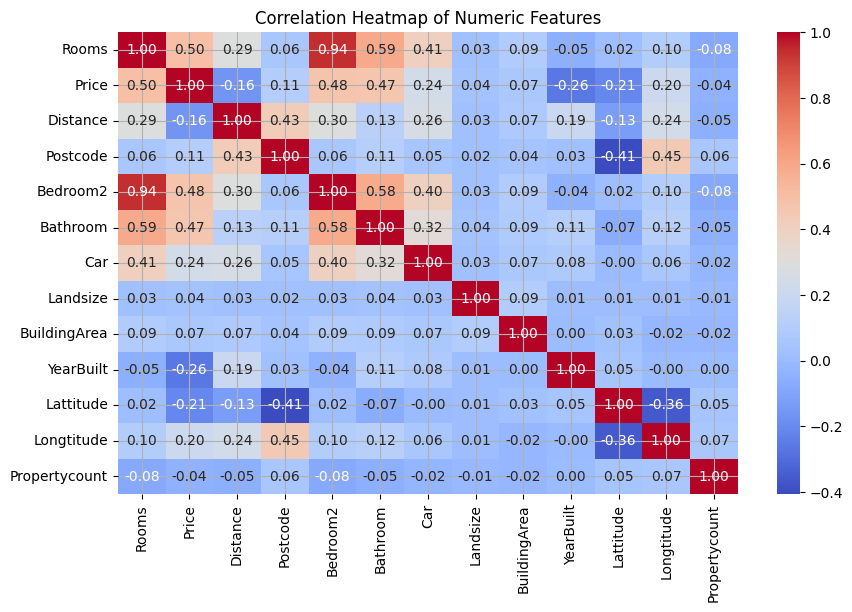

In [30]:
# Correlation heatmap
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=[float,int]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


## Insights for the heatmap

### Correlation Matrix Summary

- **Price correlations**:  
  - Moderately **positive correlation** with `Rooms`, `Bedroom2`, and `Bathroom` (~0.47–0.50).  
  - Slight positive correlation with `Car` (~0.24).  
  - Negative correlation with `Distance` (~ -0.16), meaning properties closer to the CBD are more expensive.  
  - Negative correlation with `YearBuilt` (~ -0.26), suggesting older properties tend to be less expensive than newer ones.

- **Feature redundancy**:  
  - `Rooms` and `Bedroom2` show an extremely high correlation (~0.94), indicating they represent almost the same information.  
  - `Rooms` also strongly correlates with `Bathroom` (~0.59).  
  - These overlapping features may cause **multicollinearity** in modeling and could be reduced.

- **Weak/insignificant correlations**:  
  - `Landsize`, `BuildingArea`, and `Propertycount` show very weak correlations with `Price`.  
  - Spatial variables (`Latitude`, `Longitude`) also show low correlation individually, though they may still matter in combination (e.g., regional clusters).

----------------

## 5. Save Cleaned Dataset for Task 2

In [31]:
# Save a mildly cleaned copy for Task 2. As this is just a explortary data analysis, more cleaning will be done in task 2
out_path = "melbourne_cleaned.csv"
df.to_csv(out_path, index=False)
print(f"Saved cleaned dataset to: {out_path}")

Saved cleaned dataset to: melbourne_cleaned.csv
